In [1]:
#|default_exp app

from fastai.vision.all import *
from fastbook import *
from fastdownload import download_url
from fastai.basics import *
from fastai.vision.widgets import *
import gradio as gr

In [2]:
# urls = search_images('bird photos', max_images=1)

# url = search_images('bird foto', max_images=1)
# url[0]

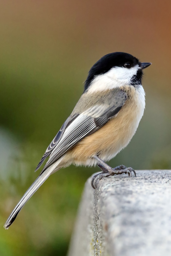

In [16]:
from fastdownload import download_url

url=search_images_ddg('birds', max_images=1)[0]
dest = 'bird.jpg'
download_url( url, dest,show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

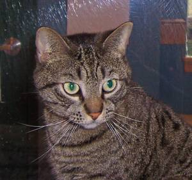

In [23]:
im = PILImage.create('data/cat (4).jpg')
im.thumbnail((192,192))
im

In [40]:
#|export
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath



def is_cat(x): return x[0].is_upper()
learn = load_learner('model_dog-vs-cat')


In [25]:
%time learn.predict(im)

CPU times: total: 562 ms
Wall time: 142 ms


('True', TensorBase(1), TensorBase([1.3498e-17, 1.0000e+00]))

In [31]:
#|export
categories =('Dog', 'Cat')

def classify(image):
    pred, adx, probs = learn.predict(image)
    return dict(zip(categories, map(float,probs)))
classify(im)

{'Dog': 1.3497946470530106e-17, 'Cat': 1.0}

In [8]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['data/dog (2).jpg', 'data/cat (2).jpg', 'data/dogcat2.jpeg']

intf = gr.Interface(fn=classify, inputs=image, outputs=label, examples= examples)
intf.launch(inline=False)

C:\Users\ahuss\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\ahuss\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\ahuss\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\ahuss\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [12]:
from nbdev.export import notebook2script
notebook2script('app.ipynb')

ImportError: cannot import name 'notebook2script' from 'nbdev.export' (C:\Users\ahuss\AppData\Local\Programs\Python\Python310\lib\site-packages\nbdev\export.py)

In [1]:
import nbdev
nbdev.export.nb_export('app.ipynb', 'app')
print('Export successful')

Export successful


In [45]:
btn_upload = SimpleNamespace(data = ['data/cat (1).jpg'])
img = PILImage.create(btn_upload.data[-1])


In [41]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))

pred,pred_idx,probs = learn.predict(img)

lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'


btn_run = widgets.Button(description='Classify')
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])